In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
from context_bandits_with_pytorch import *

In [4]:
import numpy as np
import math
from scipy import stats
import random
import matplotlib.pyplot as plt

In [5]:
n = 10 # Number of Casino machines i.e each casino act as a arm
probs = np.random.rand(n) #A # Hidden probabilities associated with each arm
eps = 0.1

In [6]:
for i, p in enumerate(probs, 1):
    print(f"Casino {i} has probability of {math.floor(p*100)}% ")

Casino 1 has probability of 43% 
Casino 2 has probability of 61% 
Casino 3 has probability of 15% 
Casino 4 has probability of 33% 
Casino 5 has probability of 87% 
Casino 6 has probability of 11% 
Casino 7 has probability of 93% 
Casino 8 has probability of 4% 
Casino 9 has probability of 22% 
Casino 10 has probability of 44% 


In [7]:
def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward


In [8]:
reward_test = [get_reward(0.7, n=10) for _ in range(2000)]

In [9]:
np.mean(reward_test)

7.0425

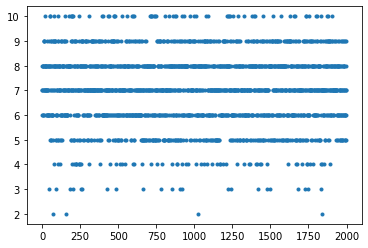

In [10]:
plt.scatter(range(len(reward_test)), reward_test, marker=".")

(array([  4.,  22.,  62., 207., 389., 518., 483., 246.,  69.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <BarContainer object of 9 artists>)

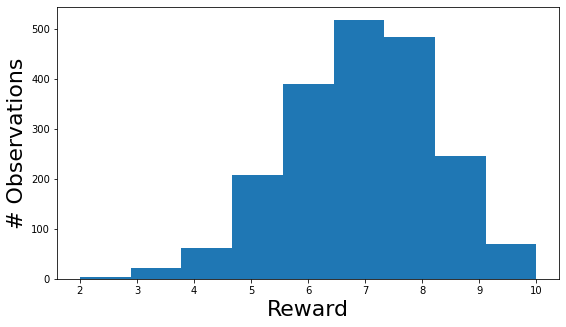

In [11]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward",fontsize=22)
plt.ylabel("# Observations",fontsize=22)
plt.hist(reward_test,bins=9)

In [12]:
# 10 actions x 2 columns
# Columns: Count #, Avg Reward
record = np.zeros((n,2))

In [13]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

In [14]:
def update_record(record, action, r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

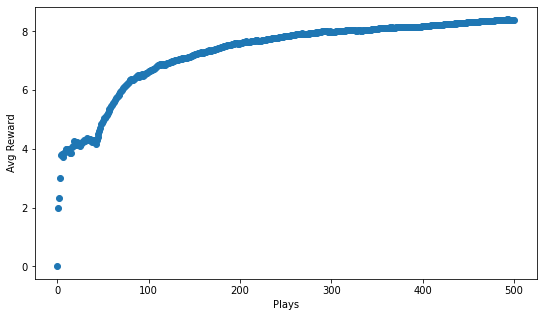

In [15]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)

rewards = [0]

for i in range(500):
    
    # Choose which lever to pull
    if random.random() > eps:
        choice = get_best_arm(record) # Get the best rewarding one 
    else:
        choice = np.random.randint(10) # Choose randomly
        
    r = get_reward(probs[choice])
    
    record = update_record(record, choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)),rewards)



In [16]:
def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

In [17]:
a = [1,3,5,8,9,2]
probs = softmax(np.array(a), 0.9)
probs

array([1.02707991e-04, 9.47770276e-04, 8.74584815e-03, 2.45160335e-01,
       7.44731339e-01, 3.11999329e-04])

In [18]:
np.argmax(probs)

4

In [19]:
probs = np.random.rand(n)
record = np.zeros((n,2))

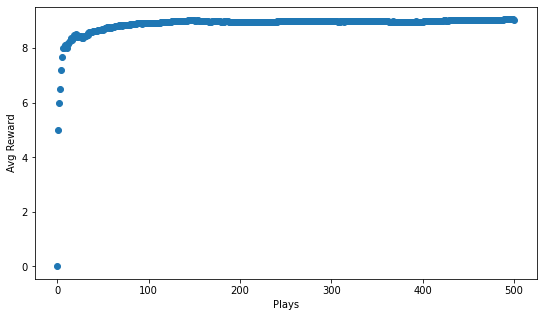

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1],tau=0.7)
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)



 # ContextBandit with Deep Learning

In [61]:
env = ContextBandit(num_states=100, num_actions=10)

In [62]:
env.update_state()
state = env.get_state()
state

4

In [65]:
reward = env.choose_action(5)
reward

10

In [66]:
env.get_reward(5)

10

In [67]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [83]:
env.reward(0.9)

10

In [74]:
state = np.random.randint(0,10)

In [80]:
env.bandit_matrix[1][2]

0.6250926158554043

In [87]:
random.random()

0.3413808055045843